<a href="https://colab.research.google.com/github/Retro6727/MLExperiments/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./personality_dataset.csv")

In [3]:
print("Summary stats:\n", df.describe())

Summary stats:
        Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.

In [4]:
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


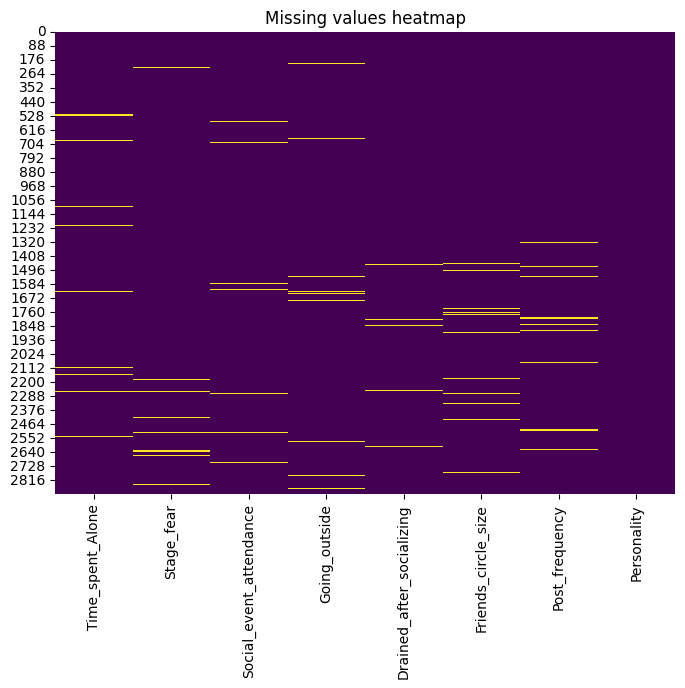

In [5]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heatmap")
plt.show()

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns \n", categorical_cols)
print("Numerical Columns \n", numerical_cols)

Categorical Columns 
 Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Numerical Columns 
 Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


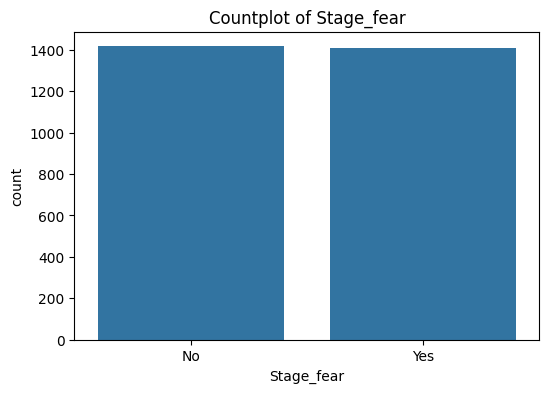

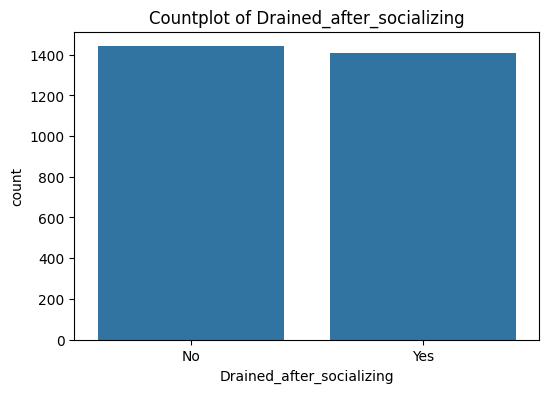

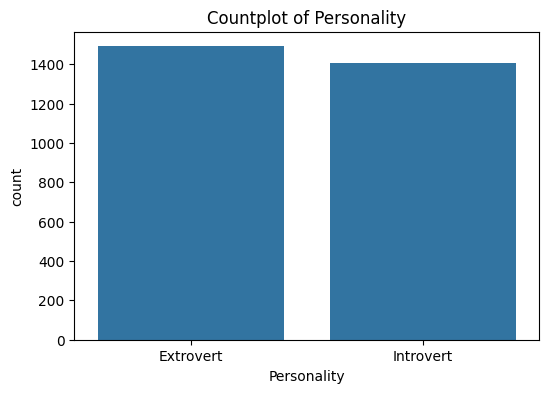

In [7]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()

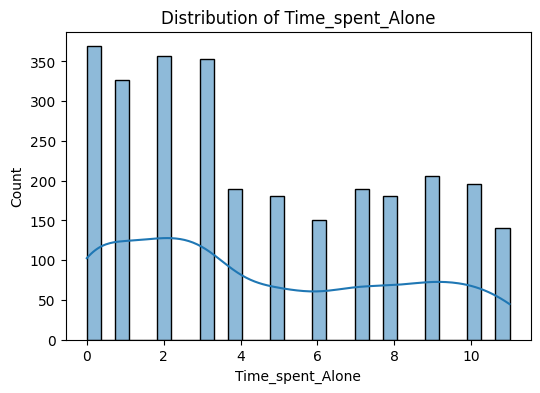

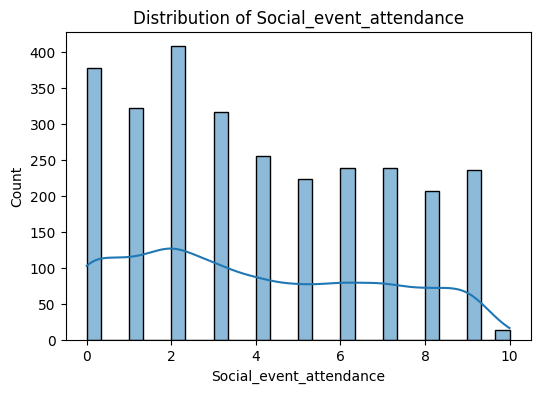

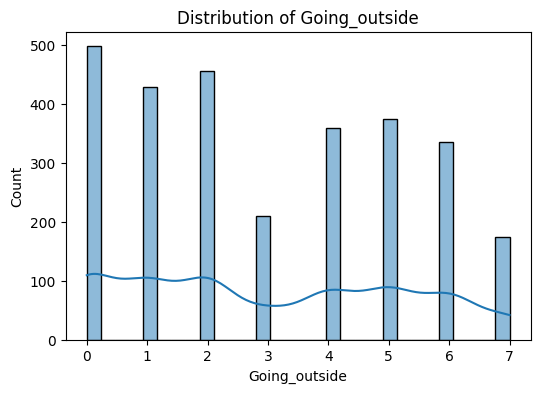

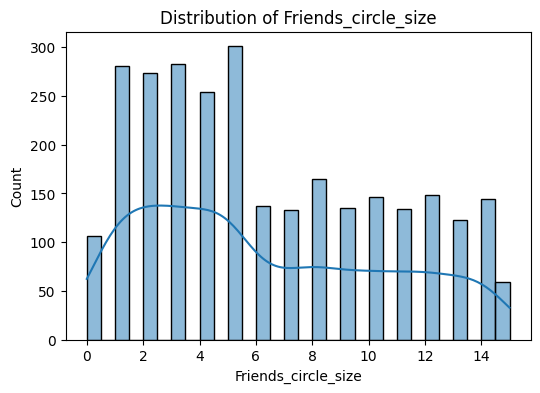

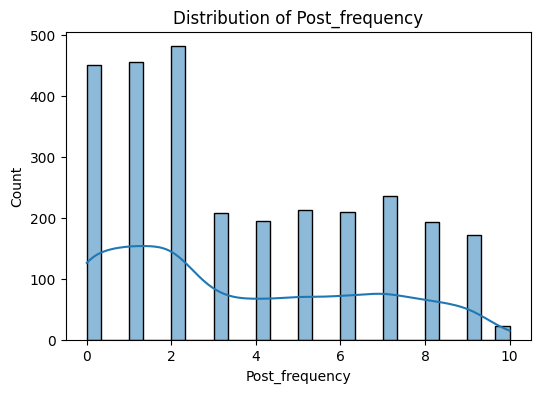

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

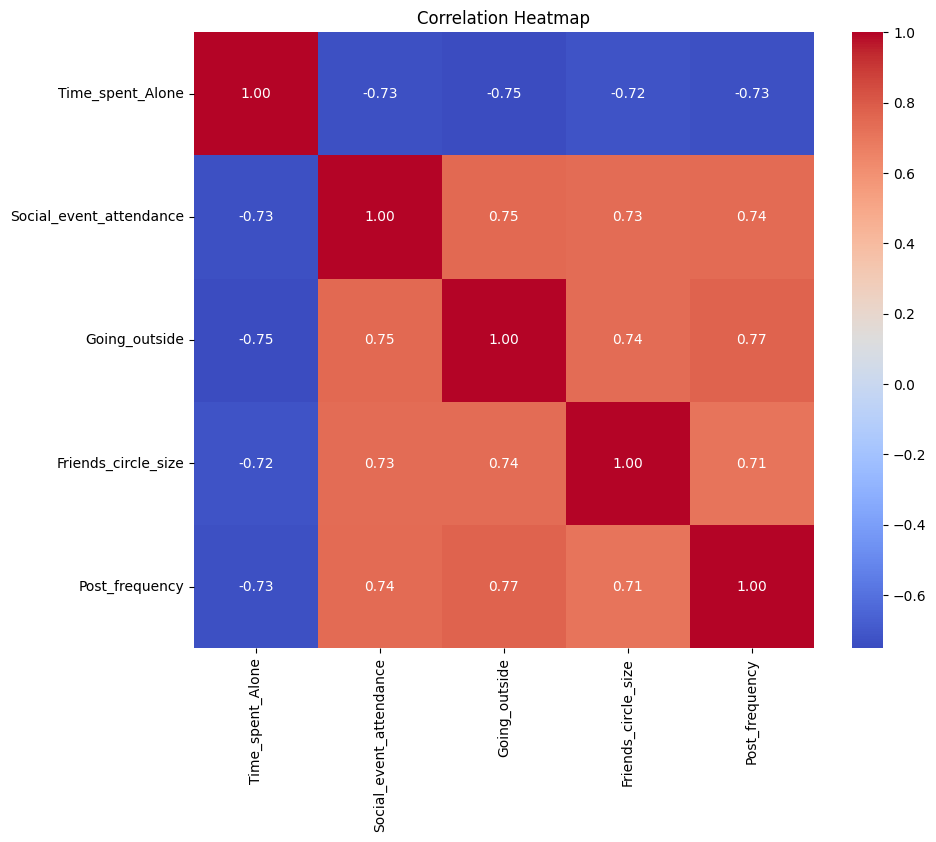

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

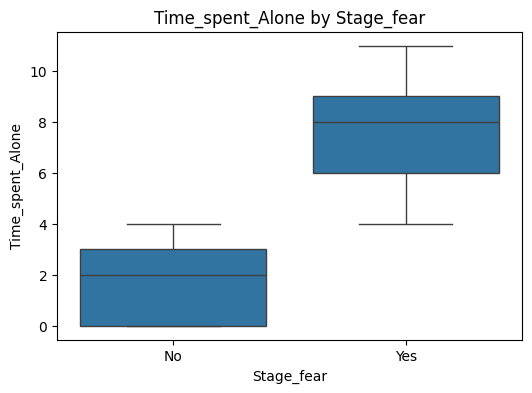

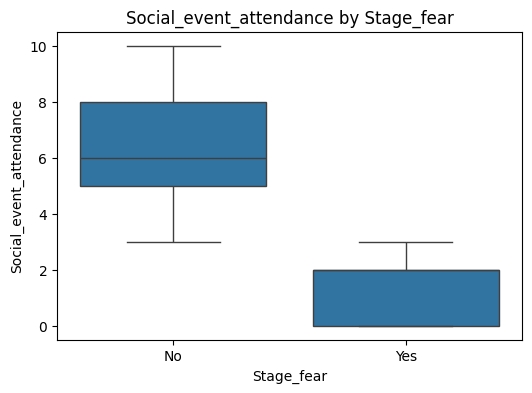

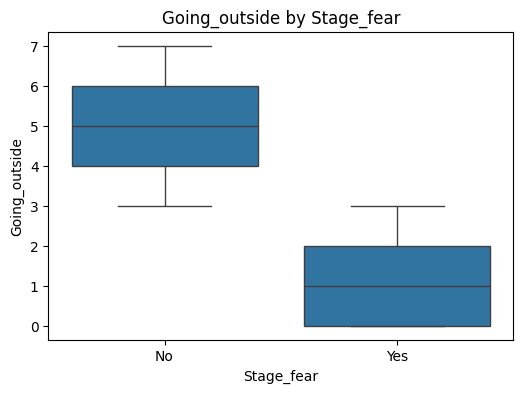

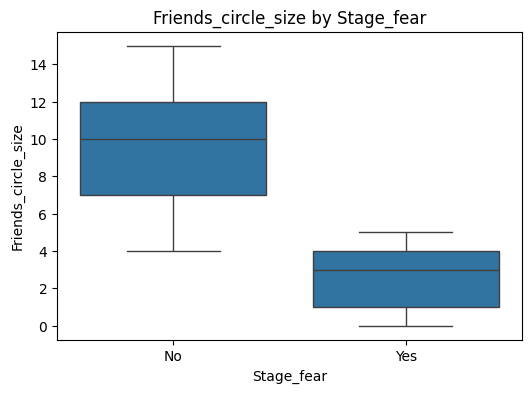

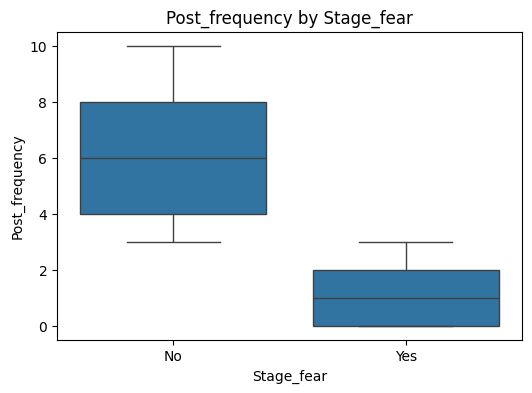

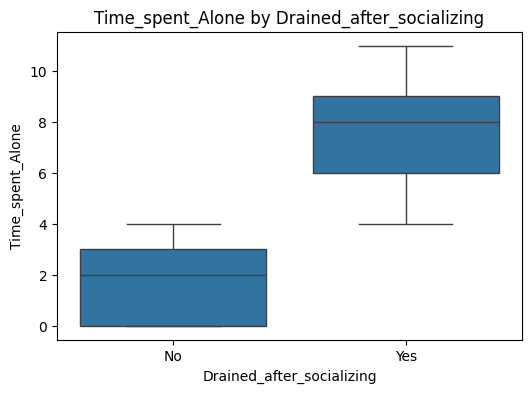

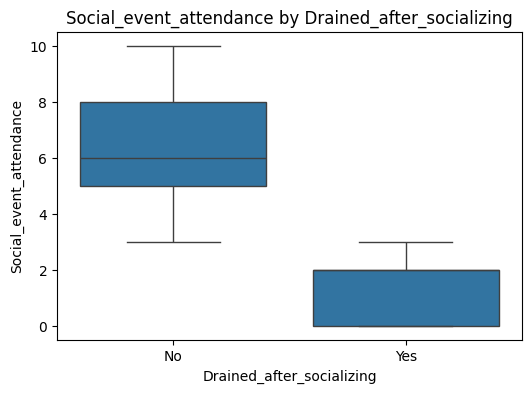

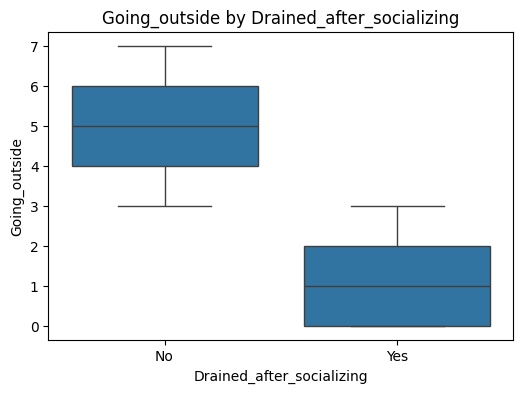

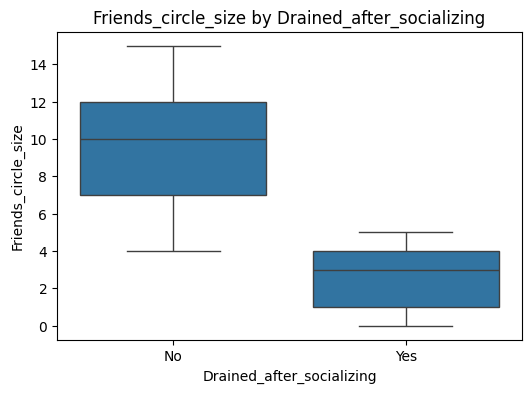

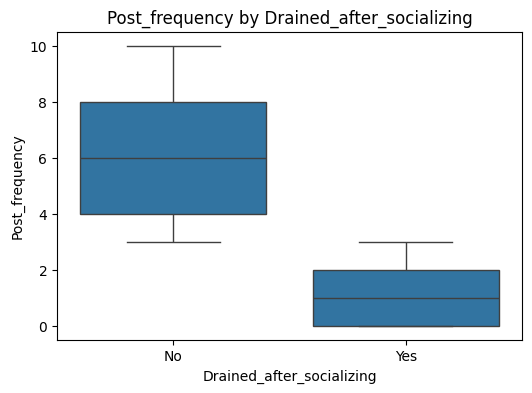

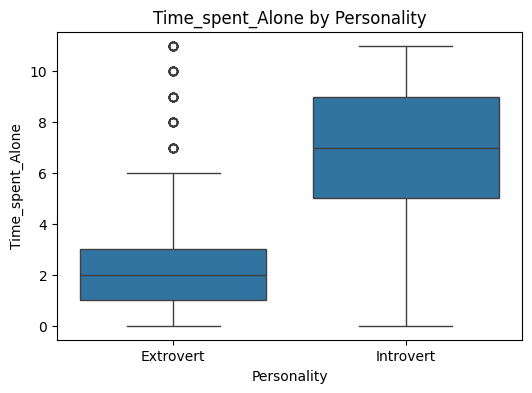

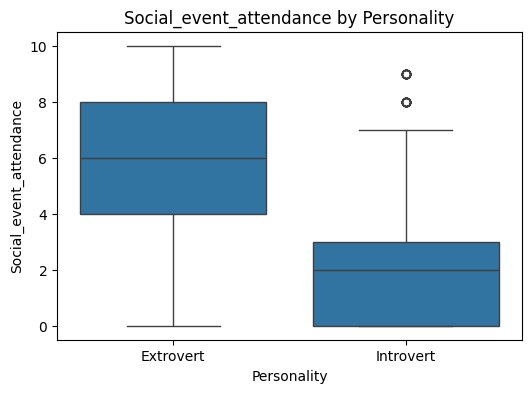

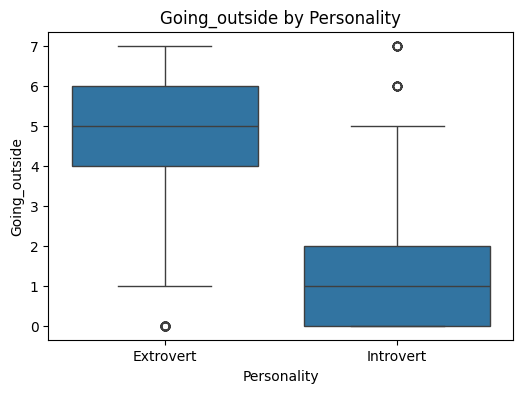

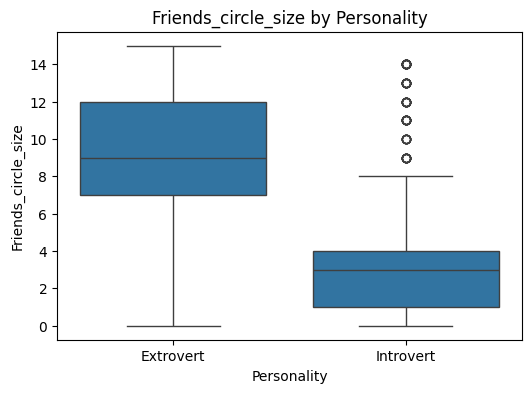

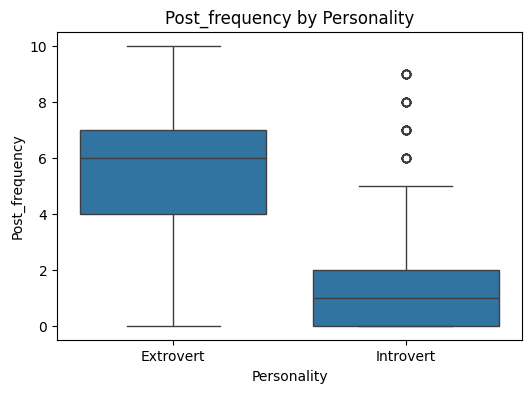

In [ ]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f"{num_col} by {cat_col}")
        plt.show()

In [ ]:
print("Skewness")
print(df[numerical_cols].skew())
print("Kurtosis")
print(df[numerical_cols].kurtosis())

Skewness
Time_spent_Alone           0.385821
Social_event_attendance    0.294742
Going_outside              0.192891
Friends_circle_size        0.425051
Post_frequency             0.474510
dtype: float64
Kurtosis
Time_spent_Alone          -1.161134
Social_event_attendance   -1.143735
Going_outside             -1.260271
Friends_circle_size       -1.026316
Post_frequency            -1.075306
dtype: float64


In [ ]:
for cat_col in categorical_cols:
    print(df.groupby(cat_col)[numerical_cols].mean())

            Time_spent_Alone  Social_event_attendance  Going_outside  \
Stage_fear                                                             
No                  1.533237                 6.433405       4.973247   
Yes                 7.514823                 1.450653       1.005793   

            Friends_circle_size  Post_frequency  
Stage_fear                                       
No                     9.825961        6.046965  
Yes                    2.652838        1.051487  
                           Time_spent_Alone  Social_event_attendance  \
Drained_after_socializing                                              
No                                 1.529830                 6.444051   
Yes                                7.514866                 1.448727   

                           Going_outside  Friends_circle_size  Post_frequency  
Drained_after_socializing                                                      
No                              4.969439             9.826552 

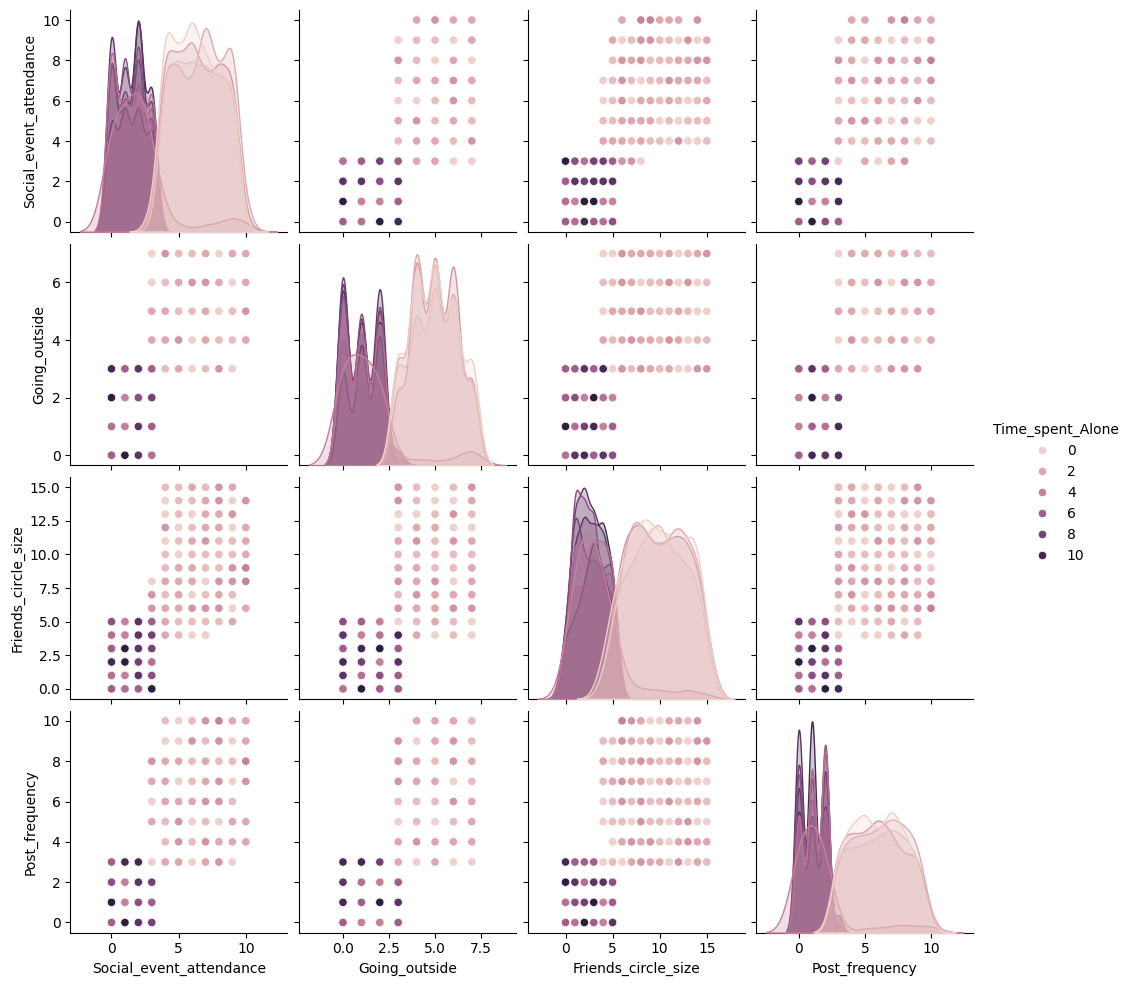

In [ ]:
sns.pairplot(df, hue="Time_spent_Alone")
plt.show()

In [ ]:
for cat_col in categorical_cols:
  print(df.groupby(cat_col)[numerical_cols].mean())

            Time_spent_Alone  Social_event_attendance  Going_outside  \
Stage_fear                                                             
No                  1.533237                 6.433405       4.973247   
Yes                 7.514823                 1.450653       1.005793   

            Friends_circle_size  Post_frequency  
Stage_fear                                       
No                     9.825961        6.046965  
Yes                    2.652838        1.051487  
                           Time_spent_Alone  Social_event_attendance  \
Drained_after_socializing                                              
No                                 1.529830                 6.444051   
Yes                                7.514866                 1.448727   

                           Going_outside  Friends_circle_size  Post_frequency  
Drained_after_socializing                                                      
No                              4.969439             9.826552 

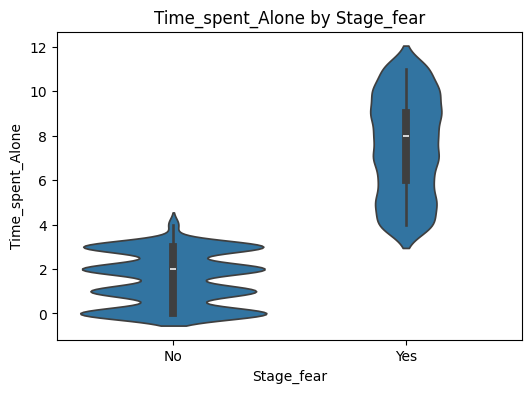

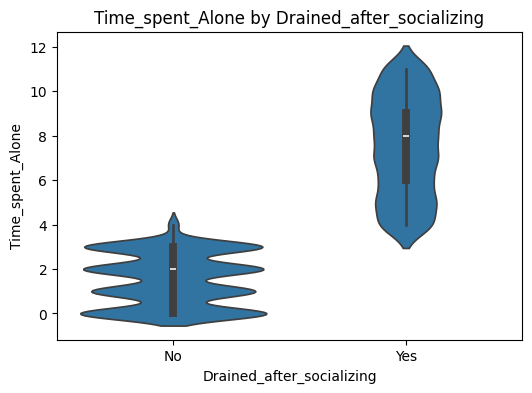

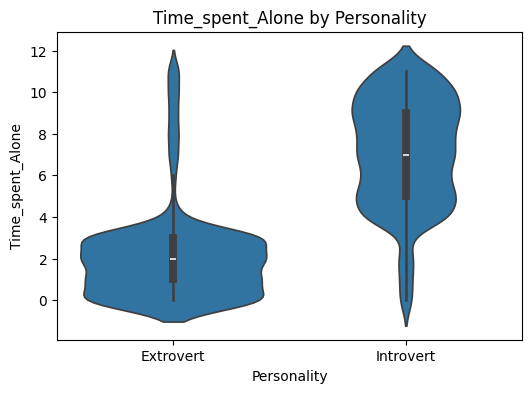

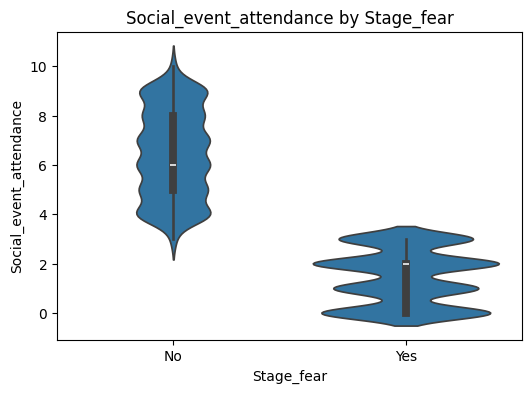

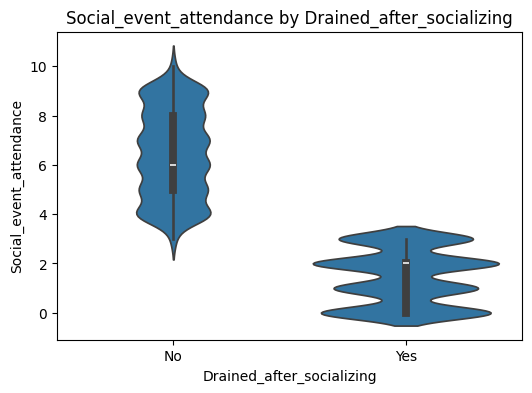

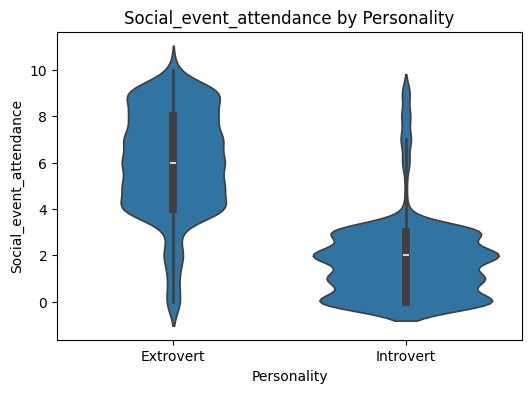

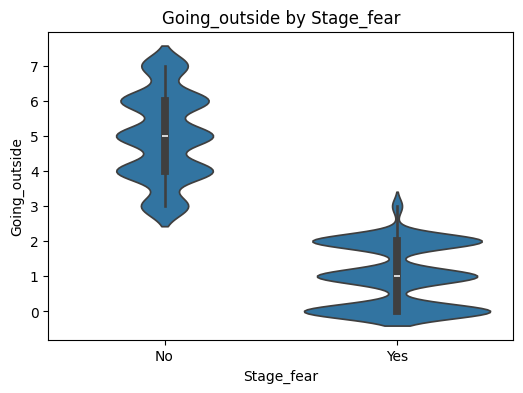

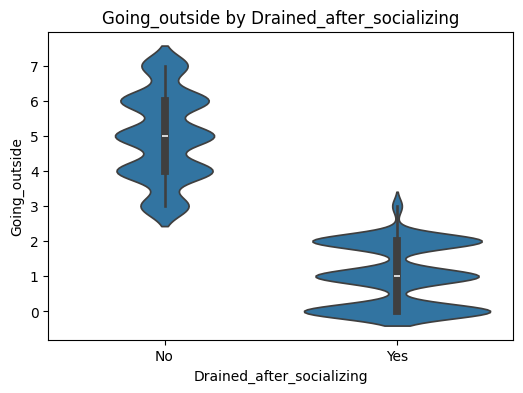

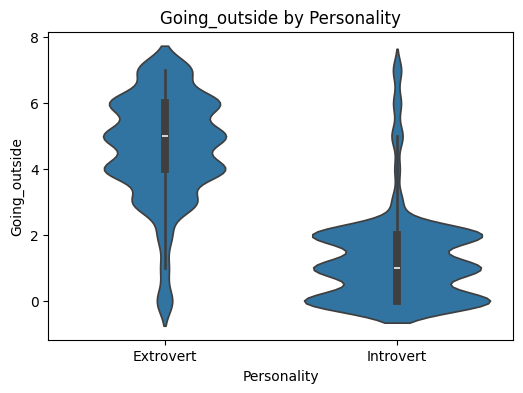

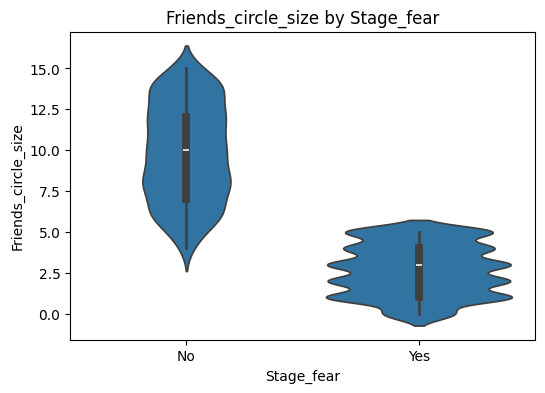

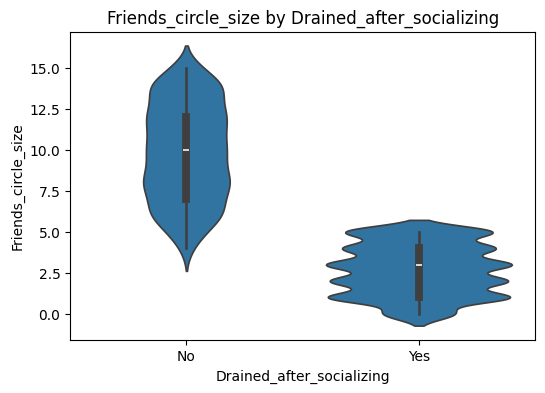

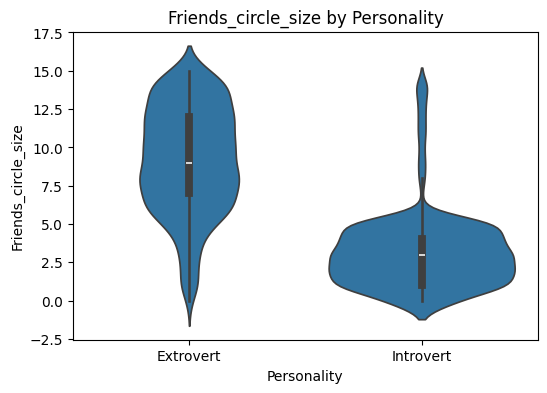

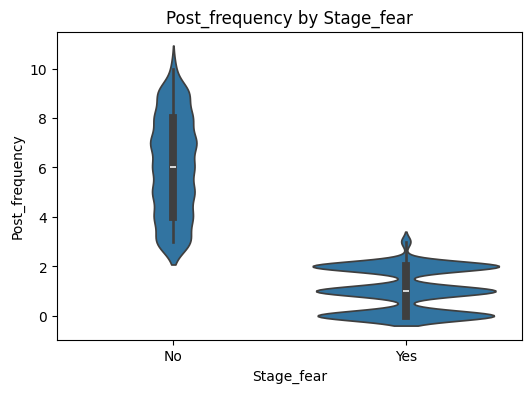

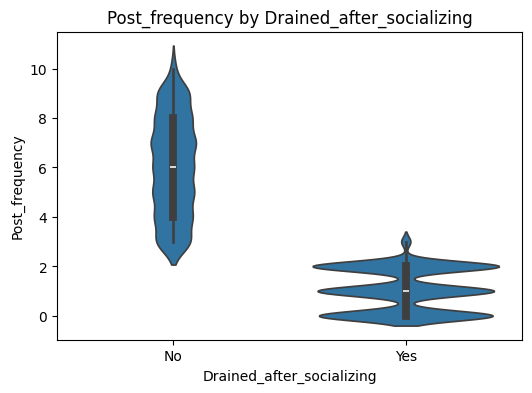

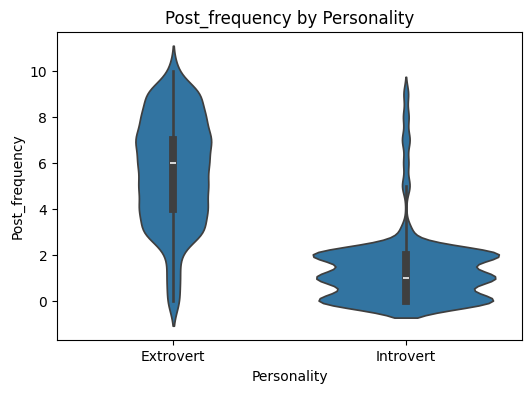

In [ ]:
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x=cat_col, y=num_col)
        plt.title(f"{num_col} by {cat_col}")
        plt.show()

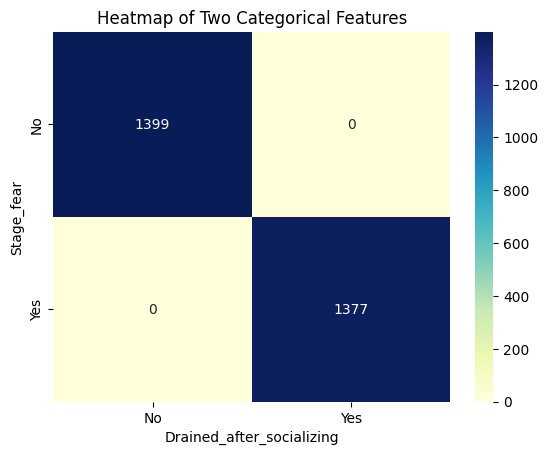

In [ ]:
cat_counts = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]])
sns.heatmap(cat_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Two Categorical Features")
plt.show()

In [ ]:
X = df[['Time_spent_Alone', 'Friends_circle_size', 'Going_outside', 'Social_event_attendance']]
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=32)
print("X Trained: ")
print(X_train.head())
print('')
print("X Tested: ")
print(X_test.head())
print('')
print("y Trained: ")
print(y_train.head())
print('')
print("y Tested: ")
print(y_test.head())
print('')

X Trained: 
      Time_spent_Alone  Friends_circle_size  Going_outside  \
1034              10.0                  2.0            0.0   
2593               3.0                  6.0            5.0   
140                2.0                  6.0            7.0   
2309               9.0                  4.0            1.0   
1411               0.0                 13.0            4.0   

      Social_event_attendance  
1034                      3.0  
2593                      5.0  
140                      10.0  
2309                      2.0  
1411                      7.0  

X Tested: 
      Time_spent_Alone  Friends_circle_size  Going_outside  \
1046               0.0                 11.0            7.0   
183                7.0                  3.0            2.0   
2592               2.0                 13.0            5.0   
2578               3.0                 14.0            5.0   
949                7.0                  0.0            1.0   

      Social_event_attendance  
1046  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

   Extrovert       0.54      1.00      0.70       311
   Introvert       1.00      0.01      0.01       269

    accuracy                           0.54       580
   macro avg       0.77      0.50      0.36       580
weighted avg       0.75      0.54      0.38       580

[[311   0]
 [267   2]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
def predict_personality():
    print("Please provide the following information to predict personality:")

    try:
        time_alone = float(input("Time spent alone (e.g., hours per day): "))
        friend_size = int(input("Friends circle size: "))
        going_outside = float(input("Frequency of going outside (e.g., times per week): "))
        social_event_attendance = float(input("Frequency of attending social events (e.g., times per week): "))

        user_data = pd.DataFrame({
            'Time_spent_Alone': [time_alone],
            'Friends_circle_size': [friend_size],
            'Going_outside': [going_outside],
            'Social_event_attendance': [social_event_attendance]
        })

        user_data_scaled = scaler.transform(user_data)

        prediction = clf.predict(user_data_scaled)

        print(f"\nBased on your input, your predicted personality is: {prediction[0]}")

    except ValueError:
        print("Invalid input. Please enter numerical values for the inputs.")

predict_personality()

Please provide the following information to predict personality:
Time spent alone (e.g., hours per day): 3
Friends circle size: 8
Frequency of going outside (e.g., times per week): 5
Frequency of attending social events (e.g., times per week): 4

Based on your input, your predicted personality is: Extrovert
